In [1]:
import pandas as pd
import scanpy as sc
import squidpy as sq
import cellcharter as cc
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read('anndata/classified_csv_complete_binary_global_annotated.h5ad')
print (adata)

/var/folders/y0/xtkgj_xx1n3fylstssq873p1r3q_9y/T/ipykernel_6231/2132919411.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Tumor_ID', y='counts', palette='viridis')


<Axes: xlabel='Tumor_ID', ylabel='counts'>

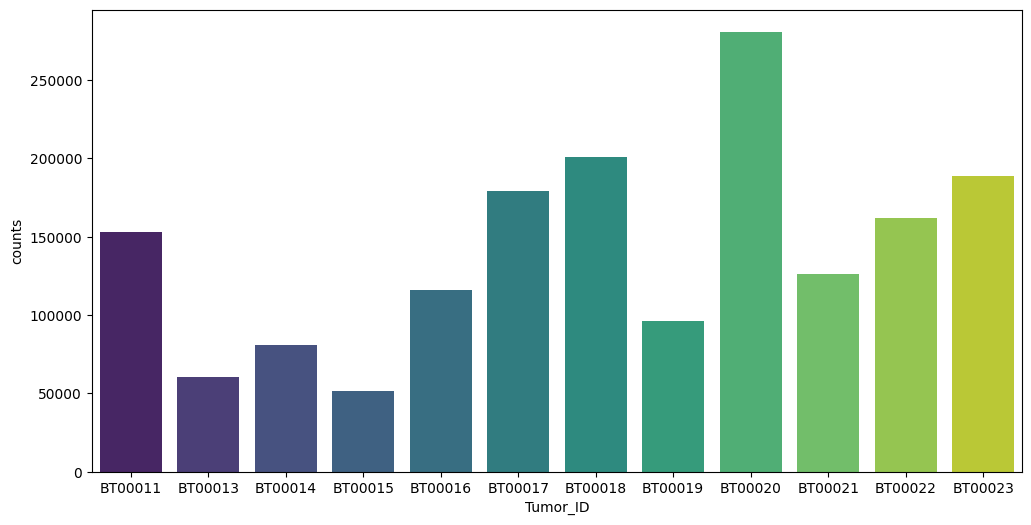

In [11]:
df = adata.obs[['Tumor_ID']]
df = df['Tumor_ID'].value_counts().reset_index()
df.columns = ['Tumor_ID', 'counts']
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Tumor_ID', y='counts', palette='viridis')

In [7]:
adata_sc3 = adata[adata.obs['spatial_cluster'] == 3]
print (adata_sc3)

View of AnnData object with n_obs × n_vars = 275809 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment', 'spatial_cluster'
    var: 'marker'
    uns: '_cellcharter', 'spatial_cluster_class_enrichment', 'spatial_cluster_colors', 'spatial_neighbors'
    obsm: 'X_cellcharter', 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


/var/folders/y0/xtkgj_xx1n3fylstssq873p1r3q_9y/T/ipykernel_6231/704463183.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Tumor_ID', y='counts', palette='viridis')


<Axes: xlabel='Tumor_ID', ylabel='counts'>

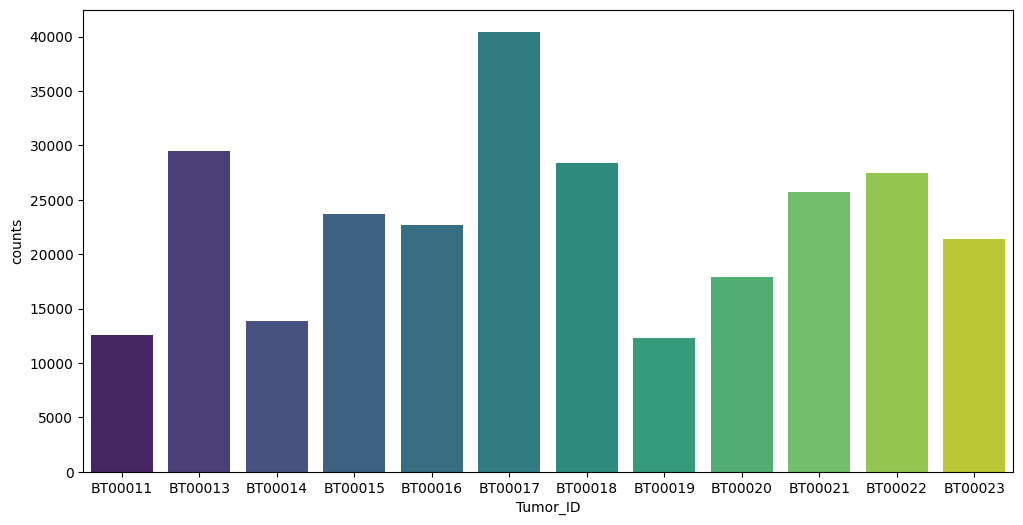

In [8]:
df = adata_sc3.obs[['Tumor_ID']]
df = df['Tumor_ID'].value_counts().reset_index()
df.columns = ['Tumor_ID', 'counts']
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Tumor_ID', y='counts', palette='viridis')

In [ ]:
unique_tum_IDs = adata_sc3.obs['Tumor_ID'].unique()

for tum_ID in unique_tum_IDs:
    # Subset AnnData for the current short_ID
    adata_sc3_subset = adata_sc3[adata_sc3.obs['Tumor_ID'] == tum_ID]
    
    # Calculate spatial neighbors and neighborhood enrichment for the subset
    sq.gr.spatial_neighbors(adata_sc3_subset)
    cc.gr.remove_long_links(adata_sc3_subset)
    sq.gr.nhood_enrichment(adata_sc3_subset, cluster_key="class")
    
    # Plot the neighborhood enrichment heat map
    plt.figure(figsize=(8,7))
    sq.pl.nhood_enrichment(adata_sc3_subset, cluster_key="class", annotate=True, 
                           title=f"Neighborhood Enrichment - Tumor {tum_ID}")
    
    # Save the plot to the folder
    plt.savefig(f"heatmaps_per_tumor_only_spatial_cluster_3/neighborhood_enrichment_{tum_ID}.png", 
                bbox_inches="tight")
    plt.close()  # Close the plot to free up memory

print(f"All heat maps saved in output folder.")

In [14]:
unique_slide = adata_sc3.obs['slide'].unique()

for slide in unique_slide:
    # Subset AnnData for the current short_ID
    adata_sc3_subset = adata_sc3[adata_sc3.obs['slide'] == slide]
    
    # Calculate spatial neighbors and neighborhood enrichment for the subset
    sq.gr.spatial_neighbors(adata_sc3_subset)
    cc.gr.remove_long_links(adata_sc3_subset)
    sq.gr.nhood_enrichment(adata_sc3_subset, cluster_key="class")
    
    # Plot the neighborhood enrichment heat map
    plt.figure(figsize=(8,7))
    sq.pl.nhood_enrichment(adata_sc3_subset, cluster_key="class", annotate=True, 
                           title=f"Neighborhood Enrichment - slide {slide}")
    
    # Save the plot to the folder
    plt.savefig(f"heatmaps_per_tumor_only_spatial_cluster_3/neighborhood_enrichment_slide{slide}.png", 
                bbox_inches="tight")
    plt.close()  # Close the plot to free up memory

print(f"All heat maps saved in output folder.")

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
  0%|                                                    | 0/1000 [00:00<?, ?/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
100%|████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.53/s]
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/gr/_nhood.py:202: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/matplotlib/colors.py:

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
100%|████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.10/s]
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/gr/_nhood.py:202: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/matplotlib/colors.py:

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
100%|████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.56/s]
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/gr/_nhood.py:202: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/matplotlib/colors.py:

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
100%|████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.46/s]
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/gr/_nhood.py:202: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/matplotlib/colors.py:

All heat maps saved in output folder.


<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

In [ ]:
#for comparison, next step: export the matrix, play statistics ... 